In [1]:
import matplotlib.pyplot as plt
import math
from Keyboard import *

Reconstructed object
[2, 1]


[2, 2]


[3, 1]


[3, 2]


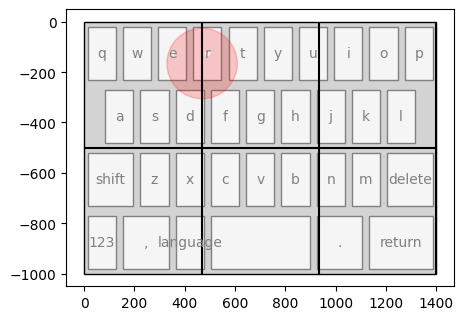

[3, 3]


[3, 4]


[4, 4]


[5, 4]


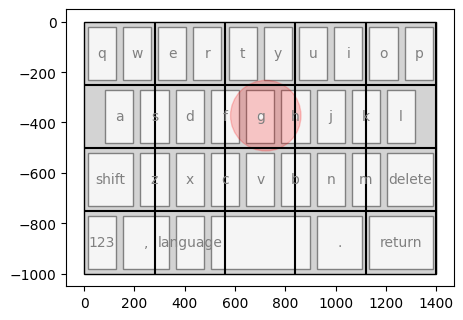

In [2]:
mykeyboard = Keyboard('keyboards/qwerty.xml', 'languagemodel.json', 'touchmodel.json', [1400,1000],[0,0], usedecoder=False)
#[col,row]
defzones  = [[2,1], [2,2], [3,1], [3,2], [3,3], [3,4], [4,4],[5,4]]
for z in defzones:
    print(z)
    f=mykeyboard.plot(5,zones=z, foveal=True)
    f.savefig('imgs/keyboards/keyboard_'+str(z[0])+'x'+str(z[1])+'.png')

In [9]:
print('held distance')
held_distance=mykeyboard.keywidth/2/0.01745241
ppi = 450
print(held_distance, 'px') #sin(1deg)=0.01745241
print(held_distance/ppi, 'inches') #557ppi
print(held_distance/ppi*2.54, 'cm')

held distance
4010.907376115963 px
8.913127502479918 inches
22.639343856298993 cm


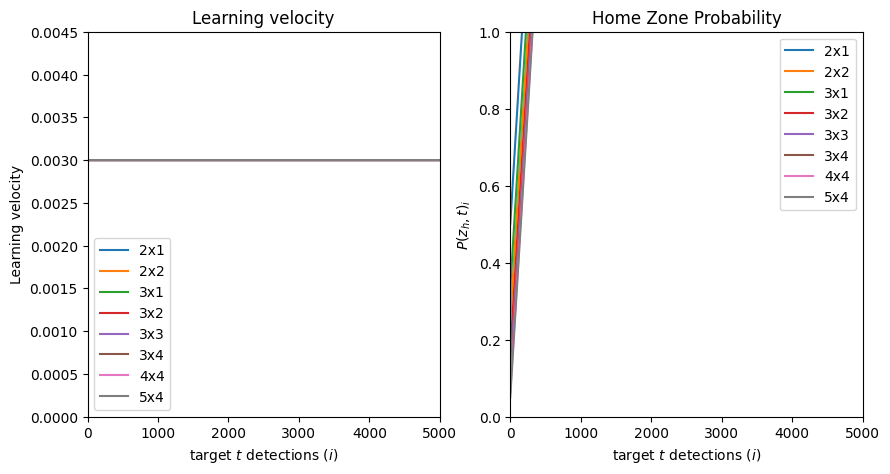

In [6]:
reps = 5000
base_lr = 0.003
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for j in range(len(defzones)):
    nzones = defzones[j][0]*defzones[j][1]
    probs = []
    interests = []

    base_prob=1/nzones
    for i in range(reps):
        interest = base_lr
        interests.append(interest)
        prob=base_prob+(interest*i)
        if prob<=1:
            probs.append(prob)  
        #else:
        #    print(i-1)
            #break
    
    axes[0].plot(interests, label=str(defzones[j][0])+'x'+str(defzones[j][1]))
    axes[1].plot(probs, label=str(defzones[j][0])+'x'+str(defzones[j][1]))

axes[0].set_xlim(0,reps)
axes[0].set_ylim(0,base_lr*1.5)
axes[1].set_xlim(0,reps)
axes[1].set_ylim(0,1.0)

axes[0].legend()
axes[1].legend()
axes[0].set_title("Learning velocity")
axes[1].set_title("Home Zone Probability")
axes[0].set_xlabel("target $t$ detections ($i$)")
axes[1].set_xlabel("target $t$ detections ($i$)")
axes[0].set_ylabel("Learning velocity")
axes[1].set_ylabel("$P(z_h,t)_i$")
#plt.suptitle("Logistic model of learning rate")
plt.savefig('imgs/probabilities/constant.png')
plt.show()

In [7]:
##### constant rate of change
reps = 5000
base_interest = 0.003
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
for j in range(len(defzones)):
    nzones = defzones[j][0]*defzones[j][1]
    probs = []
    interests = []
    entropy = []
    base_prob=1/nzones
    for i in range(reps):
        interest = (1+base_interest/nzones)**i
        interests.append(interest)
        prob=base_prob*interest
        if prob<=1:
            probs.append(prob)  
        #else:
        #    print(i-1)
            #break
    
    axes[0].plot(interests, label=str(defzones[j][0])+'x'+str(defzones[j][1]))
    axes[1].plot(probs, label=str(defzones[j][0])+'x'+str(defzones[j][1]))

axes[0].set_xlim(0,reps)
axes[0].set_ylim(0,4.5)
axes[1].set_xlim(0,reps)
axes[1].set_ylim(0,1.0)

axes[0].legend()
axes[1].legend()
axes[0].set_title("Learning velocity")
axes[1].set_title("Home Zone Probability")
axes[0].set_xlabel("target $t$ detections ($i$)")
axes[1].set_xlabel("target $t$ detections ($i$)")
axes[0].set_ylabel("Learning velocity")
axes[1].set_ylabel("$P(z_h,t)_i$")
#plt.suptitle("Logistic model of learning rate")
plt.savefig('imgs/probabilities/exponential.png')

plt.show()

In [8]:
##### decaying rate of change
reps = 5000
base_interest = 0.003
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
for j in range(len(defzones)):
    nzones = defzones[j][0]*defzones[j][1]
    probs = []
    interests = []
    prob=1/nzones
    for i in range(reps):
        interest = base_interest*math.e**(-i/(60*nzones))
        interests.append(interest)
        prob=prob*(1+interest)
        if prob<=1:
            probs.append(prob)  
        #else:
        #    print(i-1)
            #break
    
    axes[0].plot(interests, label=str(defzones[j][0])+'x'+str(defzones[j][1]))
    axes[1].plot(probs, label=str(defzones[j][0])+'x'+str(defzones[j][1]))

axes[0].set_xlim(0,reps)
#axes[0].set_ylim(0,4.5)
axes[1].set_xlim(0,reps)
axes[1].set_ylim(0,1.0)

axes[0].legend()
axes[1].legend()
axes[0].set_title("Learning velocity")
axes[1].set_title("Home Zone Probability")
axes[0].set_xlabel("target $t$ detections ($i$)")
axes[1].set_xlabel("target $t$ detections ($i$)")
axes[0].set_ylabel("Learning velocity")
axes[1].set_ylabel("$P(z_h,t)_i$")
#plt.suptitle("Logistic model of learning rate")
plt.savefig('imgs/probabilities/decaying.png')

plt.show()

In [9]:
def logistic_function(K, x, k, x0):
    #P(t) = K / (1 + e^(-k(t-t0)))
    #P(t) is performance at time t
    #K is the upper limit (maximum performance)
    #r is the learning rate
    #t0 is the midpoint time (inflection point)
    return K / (1 + math.e**(-k * (x - x0)))

reps=5000
base_lr = 0.003
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
for j in range(len(defzones)):
    nzones = defzones[j][0]*defzones[j][1]
    probs = []
    interests = []
    prob=1/nzones
    for i in range(reps):
        interest = logistic_function(base_lr, i, 1/(nzones**2), 10*base_lr) 
        interests.append(interest)
        prob=prob*(1+interest)
        if prob<=1:
            probs.append(prob)  
        #else:
        #    print(i-1)
            #break
    
    axes[0].plot(interests, label=str(defzones[j][0])+'x'+str(defzones[j][1]))
    axes[1].plot(probs, label=str(defzones[j][0])+'x'+str(defzones[j][1]))

axes[0].set_xlim(0,reps)
axes[0].set_ylim(0,base_lr)
axes[1].set_xlim(0,reps)
axes[1].set_ylim(0,1.0)

axes[0].legend()
axes[1].legend()
axes[0].set_title("Learning velocity")
axes[1].set_title("Cumulative probability")
axes[0].set_xlabel("# of character detections")
axes[1].set_xlabel("# of character detections")
axes[0].set_ylabel("Learning velocity")
axes[1].set_ylabel("Cum. probability")
plt.suptitle("Logistic model of learning rate")
plt.savefig('imgs/probabilities/logistic.png')

plt.show()

In [ ]:
## Define the logistic function
def logistic_function(K, x, k, x0):
    #P(t) = K / (1 + e^(-k(t-t0)))

    return K / (1 + math.e**(-k * (x - x0)))

# Parameters
k = 1   # Growth rate
x0 = 0  # Midpoint
x = np.linspace(-10, 10, 500)  # Range of x values

# Calculate logistic function values
y = logistic_function(x, k, x0)

In [209]:
z=4
print(z*math.log(z,10))

2.408239965311849


In [197]:
print(1/25)

0.04
